<a href="https://colab.research.google.com/github/skyMei-J/Linear-Regression-Implementation/blob/main/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regrassion

In [ ]:
def permutation(mm):
    m,n = mm.shape                                                                                                                                                                                       
    dd = np.identity(m)
    
    for j in range(0,n):
        if mm[j][j]==0:
            i=j+1
            while i < m:
                if mm[i][j]!=0:
                    mm[[i, j]] = mm[[j, i]]
                    break
                i+=1
                if i==m:
                    print("not invertible")

    return dd


In [ ]:

def solve(p,L,U):
    m,n=p.shape
    ux = []
    for i in range(m):
        ux.append(p[i])
        temp =0
        if i == (len(y)-1):
            temp = 0
        else:
            for j in range(i):
                temp+=(L[i][j]*ux[j])
        ux[i]=(ux[i]-temp)/L[i][i]
        
    invv = []
    
    for i in range(len(ux)):
        invv.append([0])
    for i in range(len(ux)-1,-1,-1):
        invv[i]=ux[i]
        temp = 0
        if i == (len(ux)-1):
            temp = 0
        else:
            for j in range(len(ux)-1,i,-1):
                temp+=(U[i][j]*invv[j])

        invv[i] = (invv[i]-temp)/U[i][i]
    return invv   

In [ ]:
def LU(b):
    m,n = b.shape
    
    
    P = permutation(b)
    PA = np.dot(P, b)
    
    L_list = []
    # up triangle
    U = PA   
    for j in range(0,n):
        for i in range(j+1,m):
            L = np.identity(m)
            L[i] = L[i] +L[j]*(PA[i][j]/PA[j][j])
            L_list.append(L)
            U[i] = PA[i] - PA[j]*(PA[i][j]/PA[j][j])

    L_list.reverse()
    L_matrix = L_list[0]
    for k in range(0,len(L_list)-1):
        L_matrix = np.dot( L_list[k+1],L_matrix)
        
    
    return P,L_matrix,U


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import scipy.linalg
import math


def inverse(D):
    m,n=D.shape
    P,L, U = LU(D)
    yyy = solve(P,L,U)
    yyy=np.array(yyy)
    return yyy


# DATA input

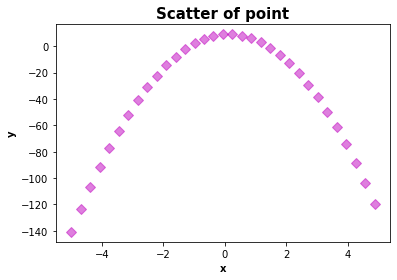

In [ ]:

df = pd.read_csv('linear_data.txt', header = None, names = ['x','y'])
x = np.array(df.x)
y = np.array(df.y)

plt.xlabel("x", fontweight = "bold")        
plt.ylabel("y", fontweight = "bold")   
plt.title("Scatter of point",fontsize = 15, fontweight = "bold")   

plt.scatter(df["x"],df["y"],c = "m",s = 50,alpha = .5,  marker = "D") 




# The number of polynomial bases n:

In [ ]:
n = int(input("the number of polynomial bases n:"))

A = []
for xx in x:
    A.append([xx ** i for i in range(n-1,-1,-1)])
A=np.array(A)
B = []
for yy in y:
    B.append([yy])
B = np.array(B)




the number of polynomial bases n:2


# The weight of the fitting line

In [ ]:
# from numpy.linalg import inv

AT = np.transpose(A)
ATA = np.dot(AT,A)
ATAinv = inverse(ATA)
ans = np.dot(ATAinv,AT)
ans = np.dot(ans,B)
print(ans)

[[  2.12909707]
 [-40.27912612]]


# Plot the result with datapoints and the fitting line.


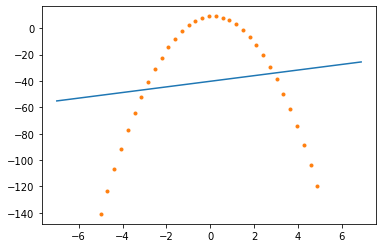

In [ ]:
     
maxx = np.max(x)
minn = np.min(x)     

xp = np.linspace(minn-2, maxx+2, 100)
p = np.poly1d(np.transpose(ans)[0])
plt.plot(xp, p(xp), '-', x, y, '.')


def output(AA,an,yy):
    for i in range(0,len(an)):
        if len(an)-1-i != 0:
            print(an[i][0],"X^",len(an)-1-i,"+ ",end='')
        else:
            print(an[i][0])
    temp = 0
    
    print("Total error:",((yy-np.dot(np.transpose(an),np.transpose(AA)))**2).sum())
    print()





# The error(L2-norm) of the fitting line.

In [ ]:
output(A,ans,y)

2.129097066511054 X^ 1 + -40.27912612124099
Total error: 63987.84575778297



# Logistic Regressoin

In [ ]:
def plot_ground_truth(data1,data2):
    plt.xlabel("x", fontweight = "bold")                
    plt.ylabel("y", fontweight = "bold")   
    plt.title("Scatter of point",fontsize = 15, fontweight = "bold")       

    plt.scatter(data1["x"],data1["y"],c = "m",s = 50, alpha = .5,marker = "D")           
    plt.scatter(data2["x"],data2["y"],c = "b",s = 50,alpha = .5,marker = "D")           


# Plot the ground truth of data points.

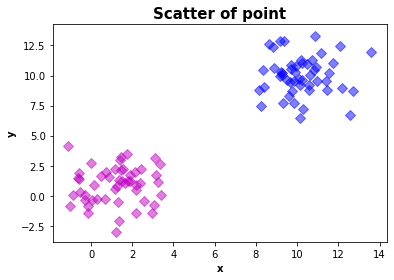

In [ ]:
df11 = pd.read_csv('Logistic_data1-1.txt',header = None, names = ['x','y'])
df12 = pd.read_csv('Logistic_data1-2.txt',header = None, names = ['x','y'])

plot_ground_truth(df11,df12)


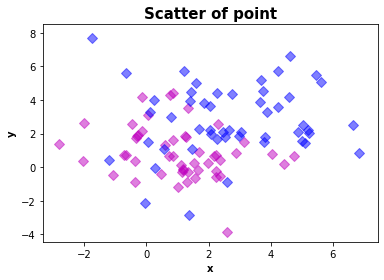

In [ ]:
df21 = pd.read_csv('Logistic_data2-1.txt',header = None, names = ['x','y'])
df22 = pd.read_csv('Logistic_data2-2.txt',header = None, names = ['x','y'])

plot_ground_truth(df21,df22)


In [ ]:
np11 = np.array(df11)
np12 = np.array(df12)
np21 = np.array(df21)
np22 = np.array(df22)

def findXY(np0,np1):
    m0,n0 = np0.shape
    m1,n1 = np1.shape
    row = m0+m1
    X = np.ones((row,n0+1))
    
    X[0:m0,:-1]=np0
    X[m0:row:,:-1]=np1
    
    Y = np.ones((row,1))
    Y[m0:row] = 0
    return X,Y


X ,Y= findXY(np11,np12)
Xex2 ,Yex2= findXY(np21,np22)


<div>
<img src="attachment:image.png" width="480" heigth="240"/>
</div>

In [ ]:


def sigmoid(L):
    return 1./(1+np.exp((-L)))



In [ ]:
def L2_error(X,Y,wj):
    return ( (Y-sigmoid(np.dot(X,wj)))**2).sum()


def update_wj(Y,X,wjj,alpha):
    M = sigmoid(np.dot(X,wjj))
    wj_prime = ((((Y-M)*M*(1-M)))*X).sum(axis=0)
    wj_prime=wj_prime.reshape((-1,1))
    wjj = wjj + alpha * wj_prime
    return(wjj)


def optimal_wj(Y,X,wj,epoch,alpha):
    for i in range(epoch):
        wj = update_wj(Y,X,wj,alpha)
#         print(L2_error(X,Y,wj))
    return(wj)



In [ ]:
def CrossEntropy(X,Y,wjj):
    M = sigmoid(np.dot(X,wjj))
    m,n = Y.shape
    return (1./m)*((  (-(Y*np.log10(M))) - ((1-Y)*(np.log10(1-M)))  ).sum())

def update_wj_CrossEntropy(Y,X,wjj,alpha):
    m,n = Y.shape
    M = sigmoid(np.dot(X,wjj))
    wj_prime = ((1./m)*((M-Y)*X).sum(axis=0))
    wj_prime=wj_prime.reshape((-1,1))
    wjj = wjj  - alpha * wj_prime
    return wjj


def optimal_wj_Cross_Entropy(Y,X,wj,epoch,alpha):
    for i in range(epoch):
        wj = update_wj_CrossEntropy(Y,X,wj,alpha)
#         print(CrossEntropy(X,Y,wj))
    return wj



In [ ]:

def plot_result_sample(xyc,answj):
    positiveX = xyc[(np.dot(xyc,answj)>0).reshape(-1)][:,0].reshape(-1,1)
    positiveY = xyc[(np.dot(xyc,answj)>0).reshape(-1)][:,1].reshape(-1,1)
    negativeX = xyc[(np.dot(xyc,answj)<0).reshape(-1)][:,0].reshape(-1,1)
    negativeY = xyc[(np.dot(xyc,answj)<0).reshape(-1)][:,1].reshape(-1,1)

    plt.xlabel("x", fontweight = "bold")              
    plt.ylabel("y", fontweight = "bold")
    plt.title("Scatter of point",fontsize = 15, fontweight = "bold")

    plt.scatter(negativeX,negativeY,c = "b",s = 50,alpha = .5,marker = "D") 
    plt.scatter( positiveX,positiveY,c = "m",s = 50,alpha = .5,marker = "D") 

    maxx = np.max(xyc[:,0])
    minn = np.min(xyc[:,0])
    plt.show()

In [ ]:
def plot_line(xyc,answj,data1,data2):
    plot_ground_truth(data1,data2)
    maxx = np.max(xyc[:,0])
    minn = np.min(xyc[:,0])

    xp = np.linspace(minn+0.2, maxx+0.2, 100)
    p1 = -(answj[0]/answj[1])*xp-(answj[2]/answj[1])
    plt.plot(xp, p1)
    plt.show()

In [ ]:



def confusion_matrix(pred, true):
    result = np.zeros((2, 2))
    for i in range(len(true)):
        guess=pred[i]
        ans  =true[i]
        if guess == 0:
            guess=1
        else: 
            guess=0
        if ans == 0:
            ans=1
        else: 
            ans=0
        result[ans ][ guess ]+=1
        
    df = pd.DataFrame(result ,columns = ["predict cluster 1", "predict cluster 2"])
    df.rename(index={0:'Is cluster 1',1:'Is cluster 2'}, inplace=True)
    print(df)
    return result


   
def precision(con):
    total = con.sum()
    Accuracy = (con[0][0]+con[1][1])/total
    precision =con[0][0]/(con[0][0]+con[1][0])
    recall =   con[0][0]/(con[0][0]+con[0][1])
    print('Accuracy : ',Accuracy)
    print('precision(Successfully predicted cluster 1):',precision)
    print('recall(Successfully predicted cluster 2)  ',recall)
    return(Accuracy,precision,recall)




# please enter The parameter to choose which method using:

In [ ]:
print("which method do you want to use?")
print("1 for L2-norm")
print("2 for Cross entropy ")
method = int(input("The parameter to choose which method using:"))


which method do you want to use?
1 for L2-norm
2 for Cross entropy 
The parameter to choose which method using:1


# The confusion matrix, precision and recall with the target.
# The weight after using gradient descent
# Plot the result of my classification

data1:
The weight after using gradient descent
[[-0.8520552 ]
 [-0.62999255]
 [ 7.99832026]]
confusion matrix:
              predict cluster 1  predict cluster 2
Is cluster 1               50.0                0.0
Is cluster 2                0.0               50.0
Accuracy :  1.0
precision(Successfully predicted cluster 1): 1.0
recall(Successfully predicted cluster 2)   1.0


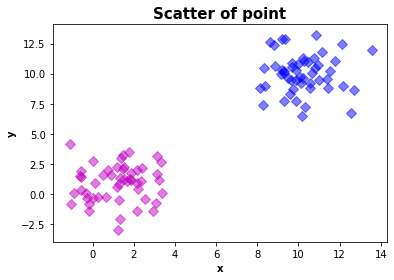

--------------------------------
data2:
The weight after using gradient descent
[[-0.51219221]
 [-0.69362293]
 [ 2.31915318]]
confusion matrix:
              predict cluster 1  predict cluster 2
Is cluster 1               41.0                9.0
Is cluster 2                9.0               41.0
Accuracy :  0.82
precision(Successfully predicted cluster 1): 0.82
recall(Successfully predicted cluster 2)   0.82


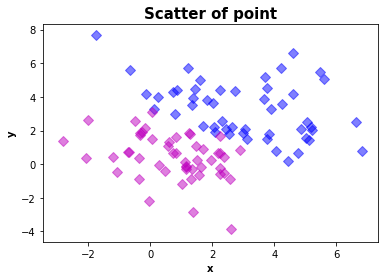

In [ ]:
if method == 1:
    print("data1:")
    alpha = 0.05
    epoch = 10000
    wj = np.zeros((3,1))+0.1
    wj =optimal_wj(Y,X,wj,epoch,alpha)
    print("The weight after using gradient descent")
    print(wj)
    guesslist = (np.dot(X,wj)>0).reshape(-1)
    anslist = (Y==1).reshape(-1)
    print("confusion matrix:")
    con_ex1 = confusion_matrix(guesslist,anslist)
    precision(con_ex1)
    plot_result_sample(X,wj)
    
    print("--------------------------------")
    print("data2:")
    alpha = 0.00003
    epoch = 100000
    wj = np.zeros((3,1))+0.1
    wj =optimal_wj(Yex2,Xex2,wj,epoch,alpha)
    print("The weight after using gradient descent")
    print(wj)
    guesslist = (np.dot(Xex2,wj)>0).reshape(-1)
    anslist = (Yex2==1).reshape(-1)
    print("confusion matrix:")
    con_ex2 = confusion_matrix(guesslist,anslist)
    precision(con_ex2)
    plot_result_sample(Xex2,wj)

else:
    print("data1:")
    alpha = 0.05
    epoch = 20000
    wj = np.zeros((3,1))+0.1 
    wj = optimal_wj_Cross_Entropy(Y,X,wj,epoch,alpha)
    print("The weight after using gradient descent")
    print(wj)
    guesslist = (np.dot(X,wj)>0).reshape(-1)
    anslist = (Y==1).reshape(-1)
    print("confusion matrix:")
    con_ex1 = confusion_matrix(guesslist,anslist)
    precision(con_ex1)

    plot_result_sample(X,wj)
    print("--------------------------------")
    print("data2:")
    alpha = 0.0003
    epoch = 100000
    wj = np.zeros((3,1))+0.1
    wj = optimal_wj_Cross_Entropy(Yex2,Xex2,wj,epoch,alpha)
    print("The weight after using gradient descent")
    print(wj)
    guesslist = (np.dot(Xex2,wj)>0).reshape(-1)
    anslist = (Yex2==1).reshape(-1)
    print("confusion matrix:")
    con_ex2 = confusion_matrix(guesslist,anslist)
    precision(con_ex2)

    plot_result_sample(Xex2,wj)


# L2-norm ex1

compute wj and error

In [ ]:

alpha = 0.05
epoch = 10000
wj = np.zeros((3,1))+0.1
wj =optimal_wj(Y,X,wj,epoch,alpha)

print(wj)

[[-0.8520552 ]
 [-0.62999255]
 [ 7.99832026]]


              predict cluster 1  predict cluster 2
Is cluster 1               50.0                0.0
Is cluster 2                0.0               50.0
Accuracy :  1.0
precision(Successfully predicted cluster 1): 1.0
recall(Successfully predicted cluster 2)   1.0


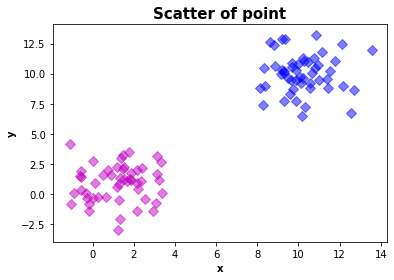

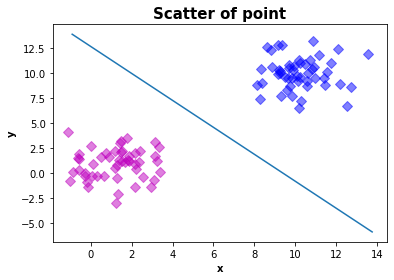

In [ ]:
guesslist = (np.dot(X,wj)>0).reshape(-1)
anslist = (Y==1).reshape(-1)
con_ex1 = confusion_matrix(guesslist,anslist)
precision(con_ex1)

plot_result_sample(X,wj)
plot_line(X,wj,df11,df12)


# cross entropy ex1

compute wj and error

In [ ]:
alpha = 0.05
epoch = 20000
wj = np.zeros((3,1))+0.1 
wj = optimal_wj_Cross_Entropy(Y,X,wj,epoch,alpha)

print(wj)



[[-0.87001894]
 [-0.71900049]
 [ 8.21318458]]


              predict cluster 1  predict cluster 2
Is cluster 1               50.0                0.0
Is cluster 2                0.0               50.0
Accuracy :  1.0
precision(Successfully predicted cluster 1): 1.0
recall(Successfully predicted cluster 2)   1.0


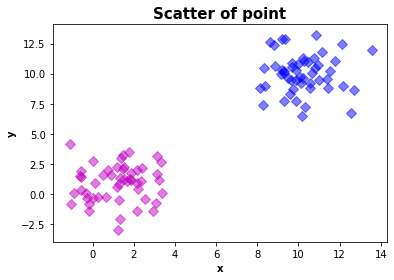

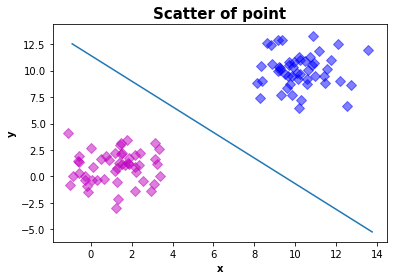

In [ ]:
guesslist = (np.dot(X,wj)>0).reshape(-1)
anslist = (Y==1).reshape(-1)
con_ex1 = confusion_matrix(guesslist,anslist)
precision(con_ex1)

plot_result_sample(X,wj)
plot_line(X,wj,df11,df12)

# L2-norm ex2

compute wj and error

In [ ]:
alpha = 0.00003
epoch = 100000
wj = np.zeros((3,1))+0.1
wj =optimal_wj(Yex2,Xex2,wj,epoch,alpha)
print(wj)


[[-0.51219221]
 [-0.69362293]
 [ 2.31915318]]


              predict cluster 1  predict cluster 2
Is cluster 1               41.0                9.0
Is cluster 2                9.0               41.0
Accuracy :  0.82
precision(Successfully predicted cluster 1): 0.82
recall(Successfully predicted cluster 2)   0.82


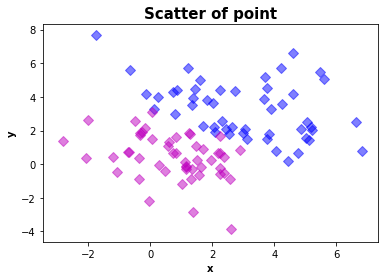

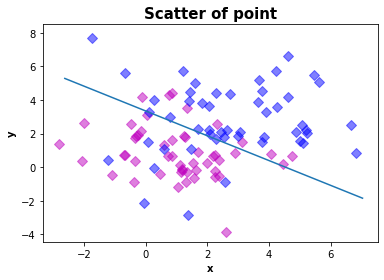

In [ ]:
guesslist = (np.dot(Xex2,wj)>0).reshape(-1)
anslist = (Yex2==1).reshape(-1)
con_ex2 = confusion_matrix(guesslist,anslist)
precision(con_ex2)
plot_result_sample(Xex2,wj)
plot_line(Xex2,wj,df21,df22)

# Cross entropy ex2

compute wj and error

In [ ]:
alpha = 0.0003
epoch = 100000
wj = np.zeros((3,1))+0.1
wj = optimal_wj_Cross_Entropy(Yex2,Xex2,wj,epoch,alpha)
print(wj)

[[-0.44940561]
 [-0.51256201]
 [ 1.64063683]]


              predict cluster 1  predict cluster 2
Is cluster 1               40.0               10.0
Is cluster 2                8.0               42.0
Accuracy :  0.82
precision(Successfully predicted cluster 1): 0.8333333333333334
recall(Successfully predicted cluster 2)   0.8


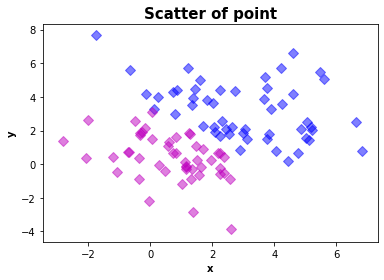

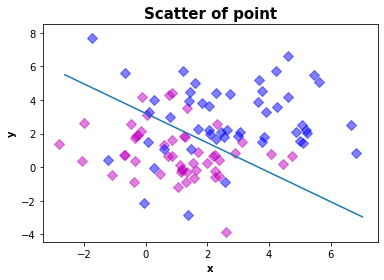

In [ ]:
guesslist = (np.dot(Xex2,wj)>0).reshape(-1)
anslist = (Yex2==1).reshape(-1)
con_ex2 = confusion_matrix(guesslist,anslist)
precision(con_ex2)

plot_result_sample(Xex2,wj)
plot_line(Xex2,wj,df21,df22)